In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
testing_letter = pd.read_csv('emnist-letters-test.csv')
training_letter = pd.read_csv('emnist-letters-train.csv')

In [3]:
print(training_letter.shape)
print(testing_letter.shape)

(88799, 785)
(14799, 785)


In [4]:
y1 = np.array(training_letter.iloc[:,0].values)
x1 = np.array(training_letter.iloc[:,1:].values)

y2 = np.array(testing_letter.iloc[:,0].values)
x2 = np.array(testing_letter.iloc[:,1:].values)
print(y1.shape)
print(x1.shape)

(88799,)
(88799, 784)


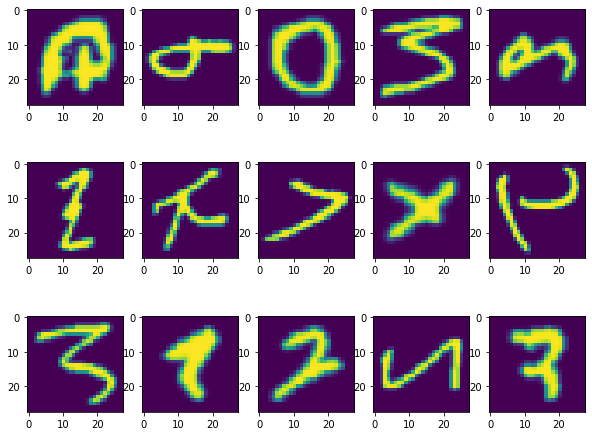

In [5]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]))

In [6]:
import tensorflow as tf

In [7]:
train_images = x1 / 255.0
test_images = x2 / 255.0

train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [8]:
number_of_classes = 37

y1 = tf.keras.utils.to_categorical(y1, number_of_classes)
y2 = tf.keras.utils.to_categorical(y2, number_of_classes)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_x,test_x,train_y,test_y = train_test_split(train_images,y1,test_size=0.2,random_state = 42)

In [12]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,3,input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
MCP = ModelCheckpoint('Best_points.h5',verbose=1,save_best_only=True,monitor='val_accuracy',mode='max')
ES = EarlyStopping(monitor='val_accuracy',min_delta=0,verbose=0,restore_best_weights = True,patience=3,mode='max')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0001)

In [15]:
history = model.fit(train_x,train_y,epochs=10,validation_data=(test_x,test_y),callbacks=[MCP,ES,RLP])

Epoch 1/10
2220/2220 [==============================] - 97s 43ms/step - loss: 0.5551 - accuracy: 0.8268 - val_loss: 0.3556 - val_accuracy: 0.8838

Epoch 00001: val_accuracy improved from -inf to 0.88378, saving model to Best_points.h5
Epoch 2/10
2220/2220 [==============================] - 103s 47ms/step - loss: 0.2769 - accuracy: 0.9093 - val_loss: 0.3247 - val_accuracy: 0.8987

Epoch 00002: val_accuracy improved from 0.88378 to 0.89870, saving model to Best_points.h5
Epoch 3/10
2220/2220 [==============================] - 56s 25ms/step - loss: 0.2183 - accuracy: 0.9274 - val_loss: 0.3124 - val_accuracy: 0.9034

Epoch 00003: val_accuracy improved from 0.89870 to 0.90338, saving model to Best_points.h5
Epoch 4/10
2220/2220 [==============================] - 56s 25ms/step - loss: 0.1880 - accuracy: 0.9378 - val_loss: 0.4775 - val_accuracy: 0.8992

Epoch 00004: val_accuracy did not improve from 0.90338
Epoch 5/10
2220/2220 [==============================] - 57s 26ms/step - loss: 0.1737 -

In [16]:
import seaborn as sns

Text(0, 0.5, 'Accuracy')

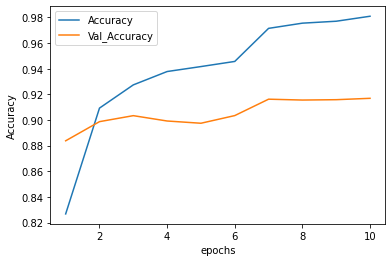

In [17]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')